<!-- PROJECT DESCRIPTION -->
# CSC 4260 Spring 2024 Term Project
This is the Google Colab notebook for the Spring 2024 Term Project for Advanced Data Science and Applications. The dataset for this project can be found here: [Google Smartphone Decimeter Challenge 2023](https://www.kaggle.com/competitions/smartphone-decimeter-2023)

<u>Google's Problem Description:</u>

“Precise smartphone positioning services enable many of the navigation features that we use today. Yet, current mobile phones only offer 3-5 meters of positioning accuracy. Lane-specific directions aren't always possible, which can lead to missed exits or inaccurate arrival times.  

Machine learning models could improve the accuracy of Global Navigation Satellite System (GNSS) data, enabling billions of Android users to have a more fine-tuned positioning experience.

Google's Precise Location Team, part of Android, hosted the Smartphone Decimeter Challenge in 2021 and 2022. This year, this competition is again dedicated to finding innovative research in smartphone GNSS positioning accuracy to enhance people's ability to navigate the world around them.  

Your work will help improve positioning accuracy to sub-meter level, or even centimeters. As a result, Android users could gain better lane-level navigation or carpool estimates during congestion. Beyond the car, better location data could enable augmented reality walking tours, precise agriculture via phones, and more” (Chow et al., 2023).

<u>Our Team's Problem Description:</u>

In a modern world dominated by smartphones, people have become heavily reliant on the navigation system and applications on their smart devices for daily navigation. However, current smartphones only provide limited positioning accuracy. Moreover, lane-specific directions are not always possible. This can lead to inaccurate arrival times or even missed exits in real-time driving scenarios. To tackle accuracy issues, machine learning models can be trained to improve the accuracy of the Global Navigation Satellite System (GNSS) data, allowing billions of people to have a smoother driving experience. Google has challenged our team to find innovative research in smartphone GNSS positioning accuracy to enhance people's ability to navigate the world around them. Our work will help improve the accuracy to sub-meter level or even centimeters. As a result, billions of people can gain better lane navigation or carpool estimates during heavy traffic hours. Beyond everyday usage within the car, better location data can find applications in various fields such as tourism, agriculture, and others.  

<!-- TEAM MEMBERs -->
## Team Members
<table style="width:100%">
    <thead>
        <tr>
            <th width="25%">Cade Kennedy</th>
            <th width="25%">Harrison Peloquin</th>
            <th width="25%">Kase Johnson</th>
            <th width="25%">Robert Bingham</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td width="25%">
                <a href="https://www.linkedin.com/in/cade-kennedy-107ab7249/">
                    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>
                </a>
            </td>
             <td width="25%">
                <a href="https://www.linkedin.com/in/harrison-peloquin-2b080b24a/">
                    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>
                </a>
            </td>
            <td width="25%">
                <!-- UPDATE TO YOUR LINKEDIN -->
                <a href="https://www.linkedin.com/in/kase-johnson-02a974205/">
                    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>
                </a>
            </td>
            <td width="25%">
                <a href="https://www.linkedin.com/in/robert-bingham/">
                    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>
                </a>
            </td>
        </tr>
    </tbody>
</table>

## Works Cited
Ashley Chow, Dave Orendorff, Michael Fu, Mohammed Khider, Sohier Dane, Vivek Gulati. (2023). Google Smartphone Decimeter Challenge 2023. Kaggle. https://kaggle.com/competitions/smartphone-decimeter-2023

In [1]:
# PUT ALL IMPORTS HERE
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pyproj

/tmp/ipykernel_14796/893204766.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Here we use a regex pattern to search through all the directories and glob all the files with `device_gnss.csv`. For each file found, we read the csv and append the data to a list. Once we have gone through all the files, we can concatenate all the data leaving us with the entire dataset.

In [2]:
filenames = glob.glob('./sdc2023/train/2023-*/*/device_gnss.csv')
df_train = []

for file in filenames:
  df_train.append(pd.read_csv(file))

df_train = pd.concat(df_train, ignore_index=True)
df_train.head()

/tmp/ipykernel_14796/271390958.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train.append(pd.read_csv(file))
/tmp/ipykernel_14796/271390958.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train.append(pd.read_csv(file))
/tmp/ipykernel_14796/271390958.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train.append(pd.read_csv(file))
/tmp/ipykernel_14796/271390958.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train.append(pd.read_csv(file))
/tmp/ipykernel_14796/271390958.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train.append(pd.read_csv(file))
/tmp/ipykernel_14796/271390958.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_m

,MessageType,utcTimeMillis,TimeNanos,LeapSecond,TimeUncertaintyNanos,FullBiasNanos,BiasNanos,BiasUncertaintyNanos,DriftNanosPerSecond,DriftUncertaintyNanosPerSecond,...,SvVelocityYEcefMetersPerSecond,SvVelocityZEcefMetersPerSecond,SvClockBiasMeters,SvClockDriftMetersPerSecond,IsrbMeters,IonosphericDelayMeters,TroposphericDelayMeters,WlsPositionXEcefMeters,WlsPositionYEcefMeters,WlsPositionZEcefMeters
0,Raw,1685127017000,197600141365,18.0,0.0,-1369162037399858688,0.0,10.253592,-1871.988647,0.0,...,1144.699580,1475.625058,-63381.058183,-0.004236,0.0,5.454276,2.711277,-2.687049e+06,-4.311688e+06,3.843238e+06
1,Raw,1685127017000,197600141365,18.0,0.0,-1369162037399858688,0.0,10.253592,-1871.988647,0.0,...,-2032.124378,-2200.095138,-114181.470829,-0.001910,0.0,5.205032,2.503444,-2.687049e+06,-4.311688e+06,3.843238e+06
2,Raw,1685127017000,197600141365,18.0,0.0,-1369162037399858688,0.0,10.253592,-1871.988647,0.0,...,-2691.132489,-857.799670,133569.024550,-0.000002,0.0,6.067826,3.104736,-2.687049e+06,-4.311688e+06,3.843238e+06
3,Raw,1685127017000,197600141365,18.0,0.0,-1369162037399858688,0.0,10.253592,-1871.988647,0.0,...,-1022.605530,2389.079907,-180111.744286,-0.000351,0.0,8.847795,4.955010,-2.687049e+06,-4.311688e+06,3.843238e+06
4,Raw,1685127017000,197600141365,18.0,0.0,-1369162037399858688,0.0,10.253592,-1871.988647,0.0,...,-581.486503,3124.554715,-38576.712567,-0.000572,0.0,10.555858,5.520866,-2.687049e+06,-4.311688e+06,3.843238e+06


In [3]:
df_train.columns

Index(['MessageType', 'utcTimeMillis', 'TimeNanos', 'LeapSecond',
       'TimeUncertaintyNanos', 'FullBiasNanos', 'BiasNanos',
       'BiasUncertaintyNanos', 'DriftNanosPerSecond',
       'DriftUncertaintyNanosPerSecond', 'HardwareClockDiscontinuityCount',
       'Svid', 'TimeOffsetNanos', 'State', 'ReceivedSvTimeNanos',
       'ReceivedSvTimeUncertaintyNanos', 'Cn0DbHz',
       'PseudorangeRateMetersPerSecond',
       'PseudorangeRateUncertaintyMetersPerSecond',
       'AccumulatedDeltaRangeState', 'AccumulatedDeltaRangeMeters',
       'AccumulatedDeltaRangeUncertaintyMeters', 'CarrierFrequencyHz',
       'CarrierCycles', 'CarrierPhase', 'CarrierPhaseUncertainty',
       'MultipathIndicator', 'SnrInDb', 'ConstellationType', 'AgcDb',
       'BasebandCn0DbHz', 'FullInterSignalBiasNanos',
       'FullInterSignalBiasUncertaintyNanos', 'SatelliteInterSignalBiasNanos',
       'SatelliteInterSignalBiasUncertaintyNanos', 'CodeType',
       'ChipsetElapsedRealtimeNanos', 'ArrivalTimeNanosSince

In [4]:
df_train.describe()

,utcTimeMillis,TimeNanos,LeapSecond,TimeUncertaintyNanos,FullBiasNanos,BiasNanos,BiasUncertaintyNanos,DriftNanosPerSecond,DriftUncertaintyNanosPerSecond,HardwareClockDiscontinuityCount,...,SvVelocityYEcefMetersPerSecond,SvVelocityZEcefMetersPerSecond,SvClockBiasMeters,SvClockDriftMetersPerSecond,IsrbMeters,IonosphericDelayMeters,TroposphericDelayMeters,WlsPositionXEcefMeters,WlsPositionYEcefMeters,WlsPositionZEcefMeters
count,2.756652e+06,2.756652e+06,1680650.0,667385.000000,2.756652e+06,2.756652e+06,2.756652e+06,2.679017e+06,2.679017e+06,2.756652e+06,...,2.541299e+06,2.541299e+06,2.541299e+06,2.541299e+06,2.541299e+06,2.541299e+06,2.541299e+06,2.755051e+06,2.755051e+06,2.755051e+06
mean,1.689362e+12,6.526563e+13,18.0,2.828547,-1.373332e+18,3.402468e-02,1.261685e+01,7.130439e+02,4.246036e+00,2.581331e+00,...,-3.253907e+02,-5.409623e+01,-2.459851e+04,3.285481e-04,-1.017324e+04,1.169357e+01,6.568311e+00,-2.687150e+06,-4.304298e+06,3.852818e+06
std,5.099098e+09,5.183394e+14,0.0,8.224272,5.068167e+15,3.472213e-01,9.863444e+00,8.815537e+03,4.765922e+00,3.102011e+00,...,1.249741e+03,2.291817e+03,1.397747e+05,5.223312e-03,1.894531e+05,6.098057e+00,5.652583e+00,2.379418e+04,2.227618e+04,4.132600e+04
min,1.678311e+12,2.630000e+08,18.0,0.000000,-1.378162e+18,-9.999599e-01,2.165102e+00,-3.837232e+03,0.000000e+00,0.000000e+00,...,-3.173114e+03,-3.609076e+03,-7.345615e+05,-9.270497e-03,-7.829504e+06,3.247676e+00,2.499888e+00,-3.343289e+06,-5.177324e+06,3.573044e+06
25%,1.684872e+12,6.393020e+11,18.0,0.000000,-1.378061e+18,0.000000e+00,5.200050e+00,-4.870000e+02,1.000000e+00,0.000000e+00,...,-1.255010e+03,-2.324179e+03,-7.155629e+04,-1.290527e-03,-1.721234e+02,7.148836e+00,3.032718e+00,-2.694160e+06,-4.311202e+06,3.843171e+06
50%,1.693946e+12,1.076427e+12,18.0,0.000000,-1.377980e+18,0.000000e+00,1.026027e+01,-3.567076e+00,1.000000e+00,1.000000e+00,...,-2.704472e+02,-2.024458e+02,-1.572125e+04,-2.118638e-04,0.000000e+00,1.033016e+01,4.285036e+00,-2.688619e+06,-4.303965e+06,3.850239e+06
75%,1.694026e+12,1.637393e+12,18.0,0.000000,-1.368907e+18,0.000000e+00,1.831444e+01,2.400000e+01,9.600102e+00,3.000000e+00,...,4.949116e+02,2.284467e+03,1.952805e+04,6.484010e-04,9.346695e+00,1.407775e+01,8.131506e+00,-2.680587e+06,-4.299283e+06,3.852330e+06
max,1.694129e+12,4.293645e+15,18.0,43.715339,-1.362346e+18,9.998283e-01,1.005340e+02,6.072183e+04,4.101559e+01,1.200000e+01,...,3.051369e+03,3.609232e+03,8.652860e+05,4.340277e-02,8.477442e+05,5.850352e+01,5.965373e+01,-1.447620e+06,-3.252028e+06,5.487459e+06


In [5]:
df_train[['SvPositionXEcefMeters', 'SvPositionYEcefMeters', 'SvPositionZEcefMeters']].describe()

,SvPositionXEcefMeters,SvPositionYEcefMeters,SvPositionZEcefMeters
count,2.541299e+06,2.541299e+06,2.541299e+06
mean,-8.816834e+06,-1.197167e+07,1.230569e+07
std,1.301763e+07,1.091199e+07,1.064954e+07
min,-3.960781e+07,-2.959507e+07,-1.849022e+07
25%,-1.921183e+07,-2.013391e+07,5.479705e+06
50%,-1.193979e+07,-1.369279e+07,1.568755e+07
75%,9.671280e+05,-5.228940e+06,2.115079e+07
max,2.308298e+07,2.629148e+07,3.444740e+07


In [6]:
df_train.shape

(2756652, 58)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756652 entries, 0 to 2756651
Data columns (total 58 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   MessageType                                object 
 1   utcTimeMillis                              int64  
 2   TimeNanos                                  int64  
 3   LeapSecond                                 float64
 4   TimeUncertaintyNanos                       float64
 5   FullBiasNanos                              int64  
 6   BiasNanos                                  float64
 7   BiasUncertaintyNanos                       float64
 8   DriftNanosPerSecond                        float64
 9   DriftUncertaintyNanosPerSecond             float64
 10  HardwareClockDiscontinuityCount            int64  
 11  Svid                                       int64  
 12  TimeOffsetNanos                            float64
 13  State                                     

In [8]:
# check for how many nulls in dataset
df_train.isnull().sum()

MessageType                                        0
utcTimeMillis                                      0
TimeNanos                                          0
LeapSecond                                   1076002
TimeUncertaintyNanos                         2089267
FullBiasNanos                                      0
BiasNanos                                          0
BiasUncertaintyNanos                               0
DriftNanosPerSecond                            77635
DriftUncertaintyNanosPerSecond                 77635
HardwareClockDiscontinuityCount                    0
Svid                                               0
TimeOffsetNanos                                    0
State                                              0
ReceivedSvTimeNanos                                0
ReceivedSvTimeUncertaintyNanos                     0
Cn0DbHz                                            0
PseudorangeRateMetersPerSecond                     0
PseudorangeRateUncertaintyMetersPerSecond     

In [9]:
# check how many zeroes in dataset
df_train.isin([0]).sum()

MessageType                                        0
utcTimeMillis                                      0
TimeNanos                                          0
LeapSecond                                         0
TimeUncertaintyNanos                          586405
FullBiasNanos                                      0
BiasNanos                                    1743387
BiasUncertaintyNanos                               0
DriftNanosPerSecond                                0
DriftUncertaintyNanosPerSecond                667385
HardwareClockDiscontinuityCount               744860
Svid                                               0
TimeOffsetNanos                              2756652
State                                              0
ReceivedSvTimeNanos                                0
ReceivedSvTimeUncertaintyNanos                     0
Cn0DbHz                                            0
PseudorangeRateMetersPerSecond                     3
PseudorangeRateUncertaintyMetersPerSecond     

<Axes: xlabel='SvPositionXEcefMeters', ylabel='SvPositionYEcefMeters'>

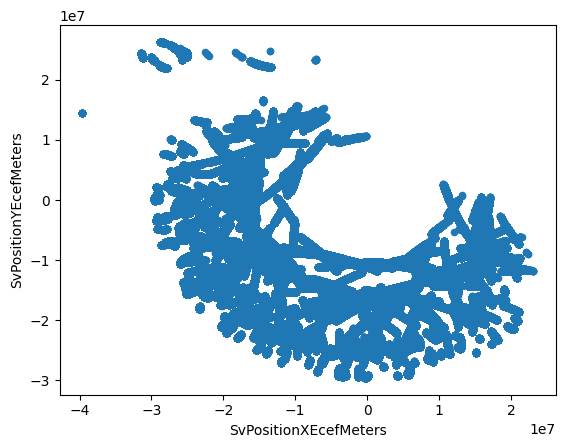

In [10]:
df_train.plot.scatter(x='SvPositionXEcefMeters', y='SvPositionYEcefMeters')

The data is in a format called [ECEF](https://en.wikipedia.org/wiki/Earth-centered,_Earth-fixed_coordinate_system). We need to convert the data to latitude, longitude, and altitude.  

In [11]:
transformer = pyproj.Transformer.from_crs(
    {"proj":'geocent', "ellps":'WGS84', "datum":'WGS84'},
    {"proj":'latlong', "ellps":'WGS84', "datum":'WGS84'},
    )

lon1, lat1, alt1 = transformer.transform(xx=df_train['SvPositionXEcefMeters'],
                                         yy=df_train['SvPositionYEcefMeters'],
                                         zz=df_train['SvPositionZEcefMeters'],
                                         radians=False)

fig = px.density_mapbox(lat=lat1, lon=lon1, z=alt1 radius=5,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="open-street-map")
fig.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1289654791.py, line 11)

In [ ]:
p7pro_sample_trail_gnss = pd.read_csv("/content/smartphone-decimeter-2023/sdc2023/train/2023-03-08-21-34-us-ca-mtv-u/pixel7pro/device_gnss.csv")
p7pro_sample_trail_gt = pd.read_csv("/content/smartphone-decimeter-2023/sdc2023/train/2023-03-08-21-34-us-ca-mtv-u/pixel7pro/ground_truth.csv")

p5_sample_trail_gnss = pd.read_csv("/content/smartphone-decimeter-2023/sdc2023/train/2023-03-08-21-34-us-ca-mtv-u/pixel5/device_gnss.csv")
p5_sample_trail_gt = pd.read_csv("/content/smartphone-decimeter-2023/sdc2023/train/2023-03-08-21-34-us-ca-mtv-u/pixel5/ground_truth.csv")

p6pro_sample_trail_gnss = pd.read_csv("/content/smartphone-decimeter-2023/sdc2023/train/2023-03-08-21-34-us-ca-mtv-u/pixel6pro/device_gnss.csv")
p6pro_sample_trail_gt = pd.read_csv("/content/smartphone-decimeter-2023/sdc2023/train/2023-03-08-21-34-us-ca-mtv-u/pixel6pro/ground_truth.csv")

In [ ]:
from datetime import datetime

def utc_to_human_readable(utcTime):
    utc_datetime_str = datetime.fromtimestamp(utcTime / 1e3)
    return datetime.strftime(utc_datetime_str, '%Y-%m-%d | %H:%M:%S')

print("Duration of input data (s):",
      (p7pro_sample_trail_gnss["utcTimeMillis"].max() - p7pro_sample_trail_gnss["utcTimeMillis"].min()) * 1e-3)
print("Starting from", utc_to_human_readable(p7pro_sample_trail_gnss["utcTimeMillis"].min()),
      "to", utc_to_human_readable(p7pro_sample_trail_gnss["utcTimeMillis"].max()))
labels = p7pro_sample_trail_gt[["LatitudeDegrees", "LongitudeDegrees", "UnixTimeMillis"]]
print("Duration of target data (s):",
      (labels["UnixTimeMillis"].max() - labels["UnixTimeMillis"].min()) * 1e-3)
print("Starting from", utc_to_human_readable(labels["UnixTimeMillis"].min()),
      "to", utc_to_human_readable(labels["UnixTimeMillis"].max()))

print("Duration of input data (s):",
      (p5_sample_trail_gnss["utcTimeMillis"].max() - p5_sample_trail_gnss["utcTimeMillis"].min()) * 1e-3)
print("Starting from", utc_to_human_readable(p5_sample_trail_gnss["utcTimeMillis"].min()),
      "to", utc_to_human_readable(p5_sample_trail_gnss["utcTimeMillis"].max()))
labels = p5_sample_trail_gt[["LatitudeDegrees", "LongitudeDegrees", "UnixTimeMillis"]]
print("Duration of target data (s):",
      (labels["UnixTimeMillis"].max() - labels["UnixTimeMillis"].min()) * 1e-3)
print("Starting from", utc_to_human_readable(labels["UnixTimeMillis"].min()),
      "to", utc_to_human_readable(labels["UnixTimeMillis"].max()))

print("Duration of input data (s):",
      (p6pro_sample_trail_gnss["utcTimeMillis"].max() - p6pro_sample_trail_gnss["utcTimeMillis"].min()) * 1e-3)
print("Starting from", utc_to_human_readable(p6pro_sample_trail_gnss["utcTimeMillis"].min()),
      "to", utc_to_human_readable(p6pro_sample_trail_gnss["utcTimeMillis"].max()))
labels = p6pro_sample_trail_gt[["LatitudeDegrees", "LongitudeDegrees", "UnixTimeMillis"]]
print("Duration of target data (s):",
      (labels["UnixTimeMillis"].max() - labels["UnixTimeMillis"].min()) * 1e-3)
print("Starting from", utc_to_human_readable(labels["UnixTimeMillis"].min()),
      "to", utc_to_human_readable(labels["UnixTimeMillis"].max()))


In [ ]:
import seaborn as sns
sns.pairplot(p7pro_sample_trail_gnss[["SvClockDriftMetersPerSecond", "AccumulatedDeltaRangeMeters",
                                  "IonosphericDelayMeters", "TroposphericDelayMeters"]])



In [ ]:
sns.pairplot(p5_sample_trail_gnss[["SvClockDriftMetersPerSecond", "AccumulatedDeltaRangeMeters",
                                  "IonosphericDelayMeters", "TroposphericDelayMeters"]])

In [ ]:
sns.pairplot(p6pro_sample_trail_gnss[["SvClockDriftMetersPerSecond", "AccumulatedDeltaRangeMeters",
                                  "IonosphericDelayMeters", "TroposphericDelayMeters"]])

In [ ]:
filenames_gnss = glob.glob('/content/smartphone-decimeter-2023/sdc2023/train/2023-*/*/device_gnss.csv')
filenames_gt = glob.glob('/content/smartphone-decimeter-2023/sdc2023/train/2023-*/*/ground_truth.csv')
df_train_gnss = []
df_train_gt = []

for file in filenames_gnss:
  df_train.append(pd.read_csv(file))

for file in filenames_gt:
  df_train.append(pd.read_csv(file))

df_train_gnss = pd.concat(df_train_gnss, ignore_index=True)
df_train_gt = pd.concat(df_train_gt, ignore_index=True)